# Binomial Distribution: Simulating & Investigating Data


The binomial distribution is a discrete probability distribution that models the outcomes of a given number of trials of some random process or experiment. The outcomes can take one of two values: success or failure. These are not value judgements and success is just any time an event of interest occurs, and failure, the occasions when is does not occur. The binomial is defined using two parameters: 1. The probability of success on any given trial. This probability remains the same for all subsequent trials and the outcomes of those trials are independent of each other. 2. The number of trials conducted. The binomial can then tell us how likely it is to observe k successes on n trials of the process or experiment. 

A common example of a process that follows a binomial distribution is repeared tosses of a fair coin. We may be interested in the probability of achieving 12 heads in 20 flips of the coin. Here observing the coin landing on heads would be a success, observing a tails would be a failure outcome. If the coin was fair we would have a probability for each flip of 0.5 (a 50% chance of the coin coming up heads or tails). Note also that each coin toss is independent of those previous. Prior events do not influence the outcome of the current coin flip (trial). This independence of trials is a necessary condition for a random process to be considered a binomial process and to have the characteristics of a binomial distribution. 

In this notebook I will use the scipy binomial method binom to generate/ simulate a dataset that follows a binomial distribution and then investigate the properties of that distribution. 

In [1]:
# Importing software libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

Generating some random data that follows a binomial distribution. 

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts   6  92  476  1163  2058  2471  2026  1182  421  98   7


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

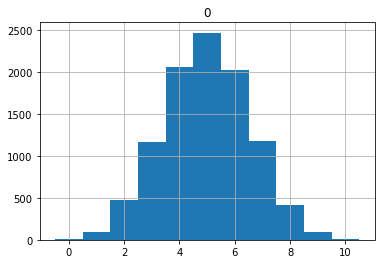

In [2]:
# I will simulate data that models a series of coin tosses using a fair coin. 
# To do this I need to make use of the scipy binom method to specify the distribution and the rvs method the generates
# random variates of the type specified (binomial in this case).

fair_coin = stats.binom.rvs(n = 10, p = 0.5, size = 10000)
# Above I have asked for each trial (n) to consist of 10 coin flips, with a probability of success of 0.5 (50%)
# on each trial, and I have specified to simulate a distribution using 10,000 trials (size = 10000). 

print(pd.crosstab(index = "counts", columns = fair_coin))

pd.DataFrame(fair_coin).hist(range =(-0.5, 10.5), bins = 11)
# Note: This is a discrete distribution as the outcome can only take on certain values. For each trial
# this is the number of heads in 10 tosses/ trial. The possible outcomes are therefore 0 through to 10 heads
# on each trial. For this reason I set the number of bins on the histogram to 11 this captures all possible outcomes. 

We can see from the above crosstab, showing the frequency with which given numbers of heads occurred in the 10,000 trials and from inspection of the histogram that the frequency (and thereby probability) of getting either 0 heads in 10 flips or 10 heads in a row were quite low. Intermediate frequencies were much more common and the distribution looks like it is normally shaped. It is however modelling a binomial process.

We got a fairly balanced and symmetric looking distribution with the fair coin example because the probabilities of success and failure were set at 50/50. If we used a different probability of success where the outcomes were not equally likely, as is the case with many real world scenarios that follow a binomial distribution, we would not get the same shape of distribution. Let us investigate this further using a different probability of success. 

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   1   6  48  282  866  2081  2949  2660  1107


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

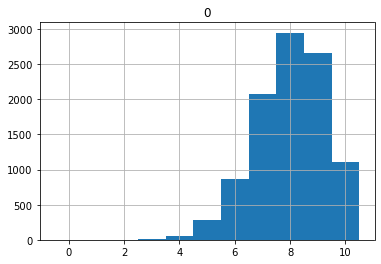

In [3]:
# Similar to the above example, we are simulating data from 10,000 trials, where each trial consists of a sequence of
# 10 coin flips. However, on this occasion the coin is baised and there is a 0.8 (80%) chance of success on any
# given trial. 
biased_coin = stats.binom.rvs(n = 10, p =0.8, size = 10000) # p is now 0.8

print(pd.crosstab(index = "counts", columns = biased_coin))

pd.DataFrame(biased_coin).hist(range =(-0.5, 10.5), bins = 11)

We can see above that, with the biased coin, where success is more likely (0.8) we are seeing a much higher frequency of larger number of heads come up on each trial of ten tosses. In this particular simulation of 10,000 trials we can also see that there were no occasions when less than 3 heads were tossed in a 10 flip sequence. The distribution is now much more skewed. In this case in the negative direction.  

We can use the Cumulative Density Function (cdf) to work out probabilities of certain outcomes or less for this simulated data. Scipy provides the cdf method to allow us to easly compute this. 

In [4]:
# Using the binom.cdf method we can obtain specific probabilities that the number of success from 10 trials in our dataset
# is less than or equal to a certain value. 
# For example, if we were interested in knowing the probability of getting k = 5 successes or less, with 10 flips/trial
# at a success probability of 0.8. Note the arguments for the cdf method: k = number of successes, n = number of trials, 
# p = probability of success/trial. 

stats.binom.cdf(k = 5, n = 10, p = 0.8)

0.03279349759999997

We can see above that the chances of getting 5 heads (successes) or less with our biased coin is only about 3% (0.032). 

We can also check the probability of getting more than a certain value by using the cdf and taking the complement by subtracting the cdf from a total probability of 1. 

In [5]:
# To work out the probability of getting more than 8 successes (heads) from 10 flips, using our biased coin with a success 
# probability of 0.8, we simply do 1 - cdf. In this example, this will tell us the probability of getting 9 or more
# heads in a trial of 10 flips. Note that we set k (successes) to 8 to get anything higher than that value. 

1 - stats.binom.cdf(k = 8, n = 10, p = 0.8)

0.37580963840000015

We see above that there is about a 38% (0.375) probability of getting 9 or more heads in 10 flips with our biased coin. 

The cdf gives us the cumulative probability for all values up to a certain numbe rof success in the distribution, or conversely the other side of the distribution using the complement. To check the probability density at a given k value for number of successes, just the probability of getting that value and not that value plus all lower (higher) values, we can use the Probability Mass Function (pmf) as the binomial is a discrete probability distribution. Scipy has a pmf method that makes these calculations easy for us to run.

In [6]:
# As an example, we can use pmf to work out the probability of getting exactly 5 successes from 10 flips with our fair coin
# That has an equal probability for success or failure (p = 0.5). 
# Note: Exact successes (k)  =  5, number of trials (n) = 10, probability of success (p) = 0.5 or 50%. 
stats.binom.pmf(k = 5, n = 10, p = 0.5)

0.24609375000000003

In [7]:
# As an alternative example, we can assess the probability of getting 8 successes from 10 flips with our biased coin
# that has a success probability of 0.8 (80%) for each trial.
# Note: Exact successes (k)  =  8, number of trials (n) = 10, probability of success (p) = 0.8 or 80%.
stats.binom.pmf(k = 8, n = 10, p = 0.8)

0.30198988799999993

We can see in the above two examples, using the pmf to calcualte probabilities for specific outcome values, that with our fair coin (p = 0.5) the probability of getting 5 heads is about 25% (0.246), and with our biased coin (p = 0.8) the probability of getting 8 heads is about 30% (0.302). 


### Summary:

- The binomial distribution is a discrete probaiblity distribution that models the number of successes from a fixed number of trials, where each trial has a set probability of a successful outcome being observed. 
- We can simulate datasets of different sizes that follows the binomial distribution using scipy's binom method and the random variates (rvs) method. 
- We can investigate the properties of the binomial distribution using the cdf and pmf.
- The cdf allows us to calculate the cumulative probability of getting a certain number of success or less. We can calculate the complement (1 - cdf) to find out the probability of getting a certain number of successes or higher. 
- The pmf allows us to calculate the probability of a specific success value (e.g. 5 successes from 10 trials). I tells us the proportion of observations at a given number of successes (k). 